In [27]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import re
from fuzzywuzzy import fuzz

In [52]:
FILE_PATH = "../data_samples/barcode09/PAQ39826_pass_barcode09_8074fd48_d90929d6_0.fastq"

In [53]:
records = list(SeqIO.parse(FILE_PATH, "fastq"))
sequences = [str(rec.seq) for rec in records]

In [69]:
# https://community.nanoporetech.com/technical_documents/chemistry-technical-document/v/chtd_500_v1_revao_07jul2016/barcode-sequences
BARCODES = {'barcode07':'AAGGTTAAAAGGATTCATTCCCACGGTAACACCAGCACCT',
            'barcode07_c':'GGTGCTGGTGTTACCGTGGGAATGAATCCTTTTAACCTTAGCAAT',
            'barcode08':'AAGGTTAAACGTAACTTGGTTTGTTCCCTGAACAGCACCT',
            'barcoce08_c':'GGTGCTGTTCAGGGAACAAACCAAGTTACGTTTAACCTTAGCAAT',
            'barcode09':'AAGGTTAAAACCAAGACTCGCTGTGCCTAGTTCAGCACCT',
            'barcode09_c':'GGTGCTGAACTAGGCACAGCGAGTCTTGGTTTTAACCTTAGCAAT',
            'barcode10':'AAGGTTAAGAGAGGACAAAGGTTTCAACGCTTCAGCACCT',
            'barcode10_c':'GGTGCTGAAGCGTTGAAACCTTTGTCCTCTCTTAACCTTAGCAAT'}

In [57]:
ADAPTER = "GTTCAGTTACGTATTGCT"

In [58]:
def get_all_occurrences(reference, all_sequences):
    positions = []
    n_occurences = []
    for s in all_sequences:
        n = 0
        occurrences = fuzzy_substring_search(s, reference)
        positions.extend(occurrences)
        n_occurences.append(len(occurrences))
        n += 1
    return sorted(positions), n_occurences

In [59]:
def fuzzy_substring_search(s, reference, threshold = 90):
    length = len(reference)
    substrings = [s[i:i + length] for i in range(len(s) - length+1)]
    tmp = [s.find(i) for i in substrings if fuzz.ratio(i, reference) >= threshold]
    return tmp

In [60]:
adapter_occurences, adapter_per_line = get_all_occurrences(ADAPTER, sequences)

<Axes: >

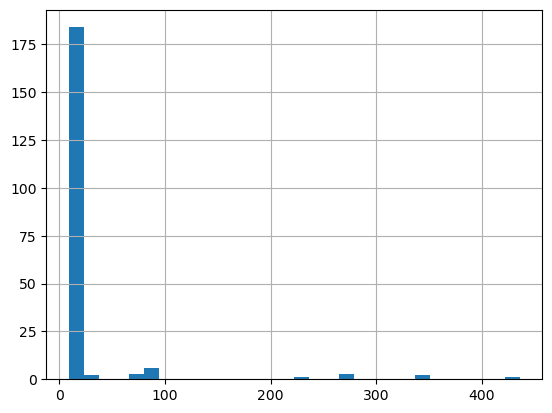

In [61]:
pd.Series(adapter_occurences).hist(bins=30)

In [62]:
pd.Series(adapter_occurences).describe()

count    202.000000
mean      29.663366
std       56.616503
min        9.000000
25%       15.000000
50%       17.000000
75%       19.000000
max      436.000000
dtype: float64

In [63]:
pd.Series(adapter_per_line).describe()

count    209.000000
mean       0.966507
std        1.352998
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        6.000000
dtype: float64

<Axes: >

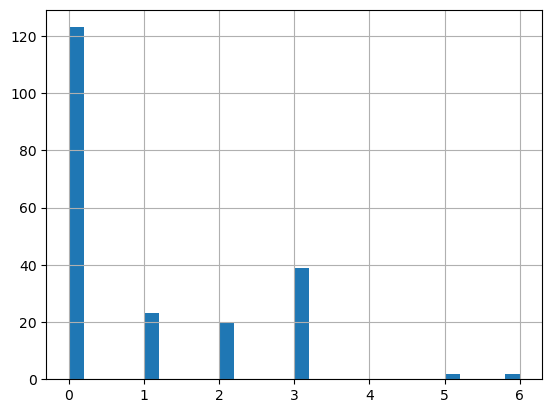

In [64]:
pd.Series(adapter_per_line).hist(bins=30)

In [70]:
barcode_occurences, barcode_per_line = get_all_occurrences(BARCODES['barcode09_c'], sequences)


<Axes: >

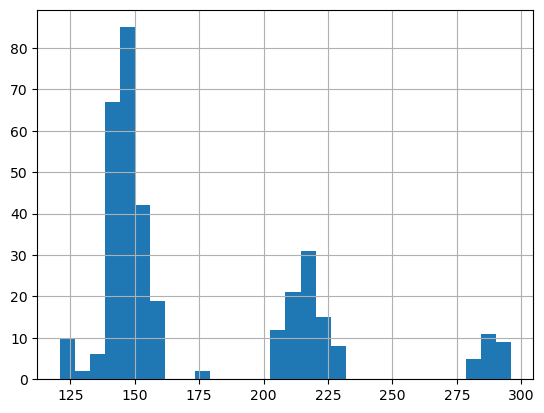

In [71]:
pd.Series(barcode_occurences).hist(bins=30)

<Axes: >

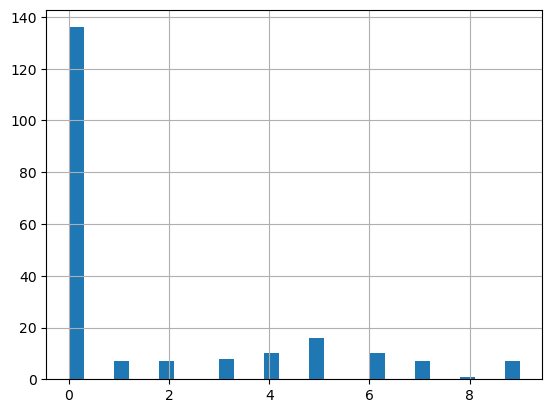

In [72]:
pd.Series(barcode_per_line).hist(bins=30)